### Packages

In [1]:
import docx
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
warnings.simplefilter("ignore")

### Plot Style

In [2]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})

### Data Loading

In [3]:
df_raw = pd.read_csv("beer_reviews.csv")
df = df_raw.copy()
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
# df_10 = df.head(10)
# writer = pd.ExcelWriter('beer_reviews.xlsx')
# df_10.to_excel(writer, 'DataFrame')
# writer.save()

In [5]:
df.shape

(1586614, 13)

### Basic Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [7]:
list(df.columns)

['brewery_id',
 'brewery_name',
 'review_time',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_profilename',
 'beer_style',
 'review_palate',
 'review_taste',
 'beer_name',
 'beer_abv',
 'beer_beerid']

In [8]:
df.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [9]:
df.describe(include=['object'])

,brewery_name,review_profilename,beer_style,beer_name
count,1586599,1586266,1586614,1586614
unique,5742,33387,104,56857
top,Boston Beer Company (Samuel Adams),northyorksammy,American IPA,90 Minute IPA
freq,39444,5817,117586,3290


In [10]:
desc = df.describe()
# doc = docx.Document("describe.docx")

# t = doc.add_table(desc.shape[0] + 1, desc.shape[1])

# for j in range(desc.shape[-1]):
#     t.cell(0,j).text = desc.columns[j]

# for i in range(desc.shape[0]):
#     for j in range(desc.shape[-1]):
#         t.cell(i + 1, j).text = str(desc.values[i, j])

# doc.save('describe.docx')

In [11]:
writer = pd.ExcelWriter('describe.xlsx')
desc.to_excel(writer, 'DataFrame')
writer.save()

### Missing Values

In [12]:
df.isnull()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,False,False,False,False,False,False,False,False,False,False,False,False,False
1586610,False,False,False,False,False,False,False,False,False,False,False,False,False
1586611,False,False,False,False,False,False,False,False,False,False,False,False,False
1586612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [14]:
all_nans = df.isnull().sum().sum()

In [15]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518478 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1518478 non-null  int64  
 1   brewery_name        1518478 non-null  object 
 2   review_time         1518478 non-null  int64  
 3   review_overall      1518478 non-null  float64
 4   review_aroma        1518478 non-null  float64
 5   review_appearance   1518478 non-null  float64
 6   review_profilename  1518478 non-null  object 
 7   beer_style          1518478 non-null  object 
 8   review_palate       1518478 non-null  float64
 9   review_taste        1518478 non-null  float64
 10  beer_name           1518478 non-null  object 
 11  beer_abv            1518478 non-null  float64
 12  beer_beerid         1518478 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 162.2+ MB


In [16]:
df.isnull().sum()

brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [17]:
print("Percent of NaN values:", round(all_nans / len(df) * 100, 2), "%")

Percent of NaN values: 4.49 %


### Basic Numbers

In [18]:
print("# of unique breweries:", df.brewery_id.nunique())
print("# of unique breweries:", df.brewery_name.nunique())
print("# of unique beers:", df.beer_beerid.nunique())
print("# of unique beers (ID):", df.beer_name.nunique())
print("# of unique users:", df.review_profilename.nunique())

# of unique breweries: 5230
# of unique breweries: 5155
# of unique beers: 49000
# of unique beers (ID): 44075
# of unique users: 32908


### Duplication

In [19]:
df.sort_values('review_overall', ascending=False)

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1586613,14359,The Defiant Brewing Company,1160005319,5.0,4.5,4.5,cbl2,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.20,33061
1054114,718,Brouwerij Bavik,1154605683,5.0,4.0,4.5,BEERchitect,Witbier,4.5,4.0,Wittekerke,5.00,2477
783659,13014,Surly Brewing Company,1307970036,5.0,5.0,5.0,deadbody,American Brown Ale,5.0,5.0,Moe's Bender,5.52,58120
783658,13014,Surly Brewing Company,1309188322,5.0,5.0,4.0,pdeme,American Brown Ale,4.5,5.0,Moe's Bender,5.52,58120
1182432,10099,Dogfish Head Brewery,1133410163,5.0,4.5,4.0,Sayson,American Double / Imperial Stout,4.5,4.0,World Wide Stout,18.00,2392
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653740,1412,Red Rock Brewing Company,1030008039,0.0,2.0,0.0,beernut7,Dunkelweizen,2.5,2.0,Red Rock Dunkel Weizen,4.00,3786
37234,1413,Desert Edge Brewery,1030197670,0.0,2.0,0.0,beernut7,Czech Pilsener,3.0,2.0,Pub Pils,4.00,3806
653706,1412,Red Rock Brewing Company,1030008142,0.0,3.0,0.0,beernut7,American Amber / Red Ale,2.5,3.5,Red Rock Amber Ale,4.00,3787
653695,1412,Red Rock Brewing Company,1030007859,0.0,2.0,0.0,beernut7,Hefeweizen,2.5,2.0,Red Rock Bavarian Weiss,4.00,3788


In [20]:
subset = ['review_profilename', 'beer_name']
df.drop_duplicates(subset=subset, keep='first')

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


In [21]:
df_no_dup = len(df.drop_duplicates(subset=subset, keep='first').index)
df_with_dup = len(df.index)

In [22]:
print("Percent of Duplicate Values:", round((df_with_dup - df_no_dup) / df_with_dup  * 100, 2),"%")

Percent of Duplicate Values: 1.46 %


### Outliers

In [23]:
# ...

### Basic Histograms

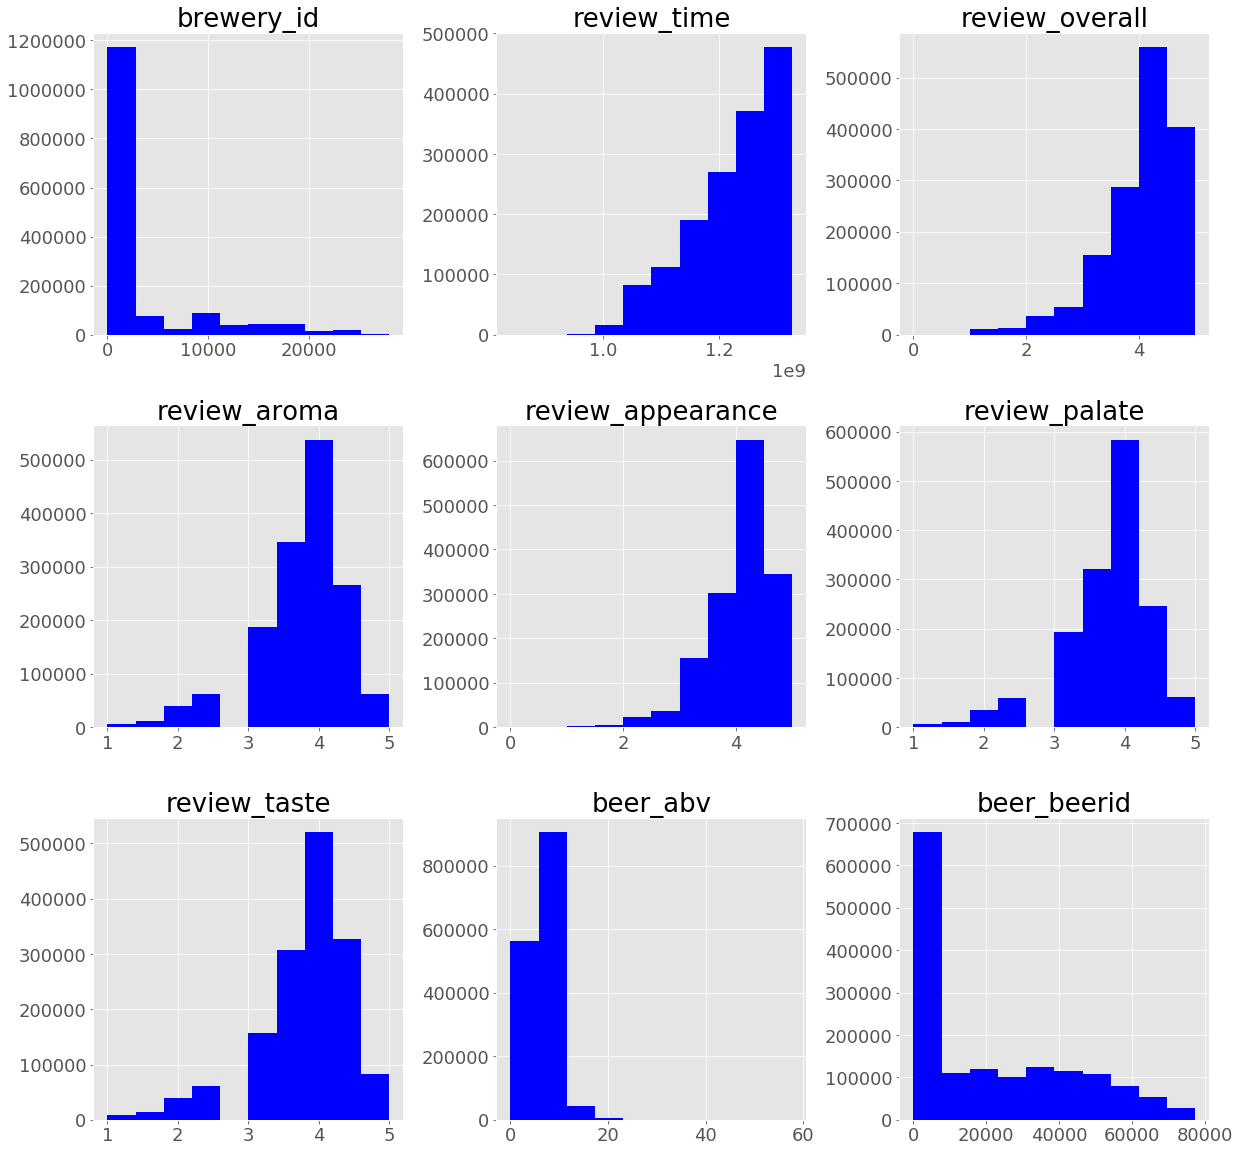

In [24]:
df.hist(figsize=(20,20), bins=10, color="blue")
plt.show()

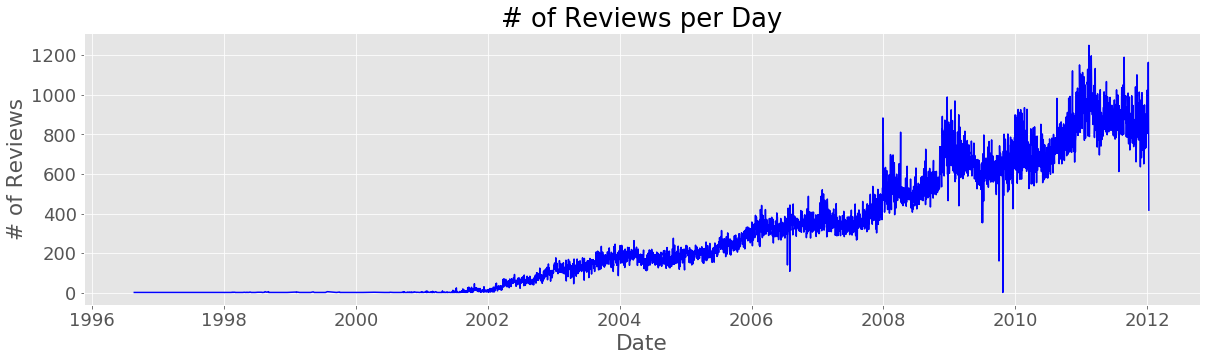

In [25]:
df['review_time'] = pd.to_datetime(df['review_time'], unit='s')
df_by_date = df[['review_time']].groupby(df['review_time'].dt.date).agg(['count'])

plt.figure(figsize=(20,5))
plt.plot(df_by_date, color="blue")
plt.xlabel("Date")
plt.ylabel("# of Reviews")
plt.title("# of Reviews per Day")
# plt.savefig('reviews_per_day.svg')
plt.show()

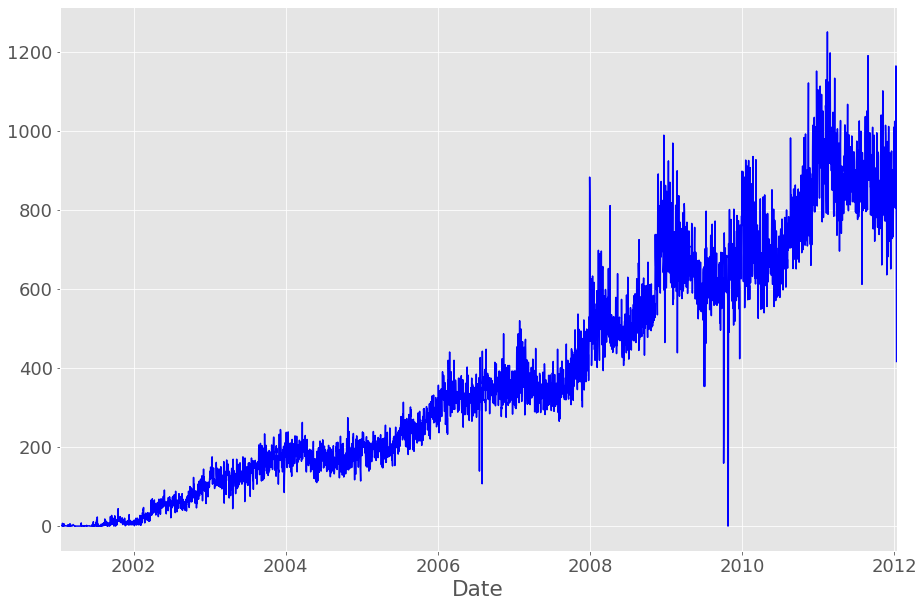

In [26]:
plt.figure(figsize=(15, 10))
plt.plot(df_by_date, color="blue")
plt.xlim(pd.Timestamp('2001-01-11'), pd.Timestamp('2012-01-11'))
plt.xlabel("Date")
# plt.ylabel("# of Reviews")
# plt.title("# of Reviews per Day")
plt.savefig('./images/reviews_ts.svg', bbox_inches='tight')
plt.show()

Ratings of $0$:

In [27]:
df = df[(df['review_overall'] >= 1) | (df['review_appearance'] >= 1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518471 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   brewery_id          1518471 non-null  int64         
 1   brewery_name        1518471 non-null  object        
 2   review_time         1518471 non-null  datetime64[ns]
 3   review_overall      1518471 non-null  float64       
 4   review_aroma        1518471 non-null  float64       
 5   review_appearance   1518471 non-null  float64       
 6   review_profilename  1518471 non-null  object        
 7   beer_style          1518471 non-null  object        
 8   review_palate       1518471 non-null  float64       
 9   review_taste        1518471 non-null  float64       
 10  beer_name           1518471 non-null  object        
 11  beer_abv            1518471 non-null  float64       
 12  beer_beerid         1518471 non-null  int64         
dtypes: datetime6

### Top 10 Lists

In [28]:
df[['review_profilename', 'beer_style']]

,review_profilename,beer_style
0,stcules,Hefeweizen
1,stcules,English Strong Ale
2,stcules,Foreign / Export Stout
3,stcules,German Pilsener
4,johnmichaelsen,American Double / Imperial IPA
...,...,...
1586609,maddogruss,Pumpkin Ale
1586610,yelterdow,Pumpkin Ale
1586611,TongoRad,Pumpkin Ale
1586612,dherling,Pumpkin Ale


Text(0.5, 0, 'ABV %')

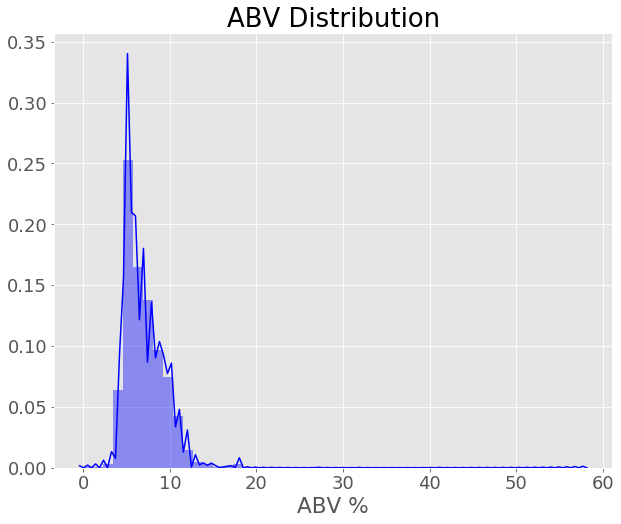

In [29]:
plt.figure(figsize=(10, 8))
plt.title("ABV Distribution")
sns.distplot(df.beer_abv, color="blue")
plt.xlabel("ABV %")

In [30]:

df[df["beer_abv"] < 20].sort_values("beer_abv", ascending=False).head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
62224,16866,The Bruery,2010-12-01 03:25:49,4.0,4.5,4.0,dyan,American Double / Imperial Stout,4.5,4.5,Cherry Chocolate Rain,19.5,61328
100100,2958,BFM Brasserie Des Franches-Montagnes,2010-05-25 14:29:30,3.0,3.5,3.0,Anthony1,Eisbock,3.0,3.0,Cuvée Alex Le Rouge Eisbock,19.5,58656
667532,13564,Sonoran Brewing Company,2010-11-30 01:09:29,1.0,1.0,2.0,womencantsail,American Malt Liquor,1.5,1.0,Sonoran 100,19.5,35014
62235,16866,The Bruery,2010-10-29 00:41:53,4.5,4.5,4.0,domtronzero,American Double / Imperial Stout,5.0,4.5,Cherry Chocolate Rain,19.5,61328
667530,13564,Sonoran Brewing Company,2011-06-19 16:35:02,1.5,1.5,2.5,MasterSki,American Malt Liquor,1.5,1.5,Sonoran 100,19.5,35014


In [31]:
df[df["beer_abv"] < 20].head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [32]:
df_abv_20 = df[df["beer_abv"] < 20]

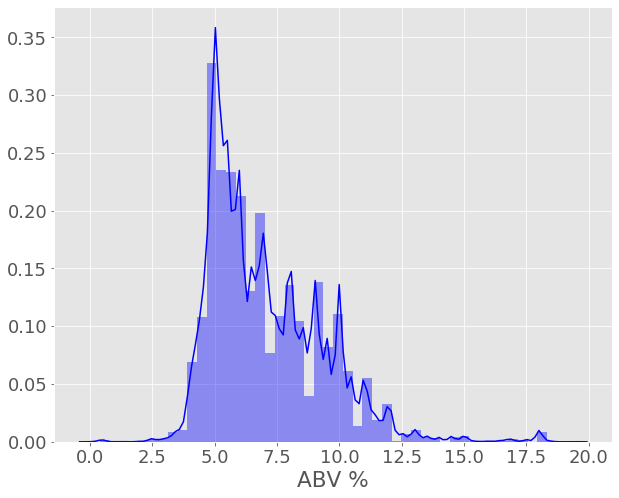

In [33]:
plt.figure(figsize=(10, 8))
# plt.title("ABV Distribution")
sns.distplot(df_abv_20.beer_abv, color="blue")
plt.xlabel("ABV %")
plt.savefig("./images/abv_dist.svg", bbox_inches='tight')
plt.show()

In [34]:
df.brewery_name.value_counts().head(10).sort_values(ascending=True)

Avery Brewing Company                 16042
Lagunitas Brewing Company             16766
Victory Brewing Company               19401
Founders Brewing Company              19951
Rogue Ales                            23446
Bell's Brewery, Inc.                  24973
Sierra Nevada Brewing Co.             28632
Stone Brewing Co.                     33009
Dogfish Head Brewery                  33790
Boston Beer Company (Samuel Adams)    38806
Name: brewery_name, dtype: int64

In [35]:
list(df.brewery_name.value_counts().head(10).sort_values(ascending=True).index)

['Avery Brewing Company',
 'Lagunitas Brewing Company',
 'Victory Brewing Company',
 'Founders Brewing Company',
 'Rogue Ales',
 "Bell's Brewery, Inc.",
 'Sierra Nevada Brewing Co.',
 'Stone Brewing Co.',
 'Dogfish Head Brewery',
 'Boston Beer Company (Samuel Adams)']

In [36]:
beer_names = df['beer_name'].value_counts()
# beer_names.plot(kind='bar')

In [37]:
df['beer_name'].value_counts()

90 Minute IPA                          3289
Old Rasputin Russian Imperial Stout    3110
Sierra Nevada Celebration Ale          2999
India Pale Ale                         2960
Two Hearted Ale                        2727
                                       ... 
99 Red Baboons                            1
Screamin' Steam                           1
Titanic Christmas Ale                     1
Vantoberfest                              1
Scintillation XIPA                        1
Name: beer_name, Length: 44075, dtype: int64

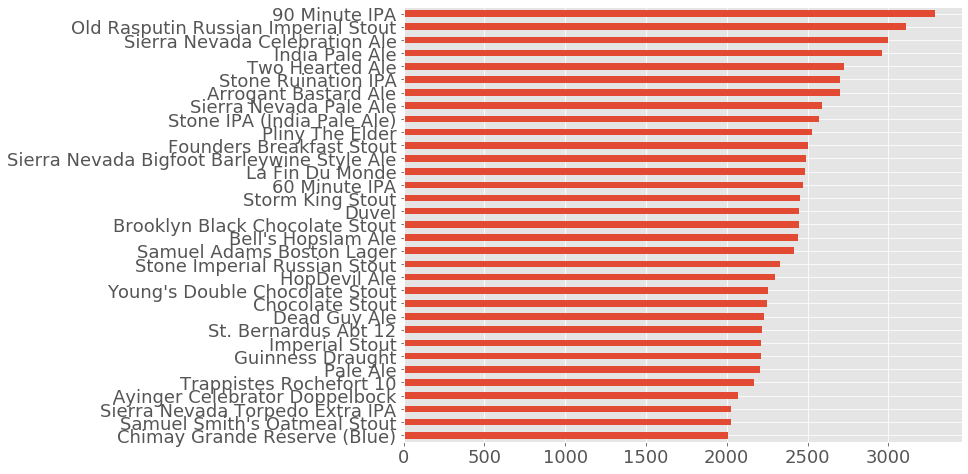

In [38]:
plt.figure(figsize=(10, 8))
beer_names[beer_names > 2000].plot(kind='barh')
plt.gca().invert_yaxis()

### Top 10

#### Most Reviewed Beer Marks

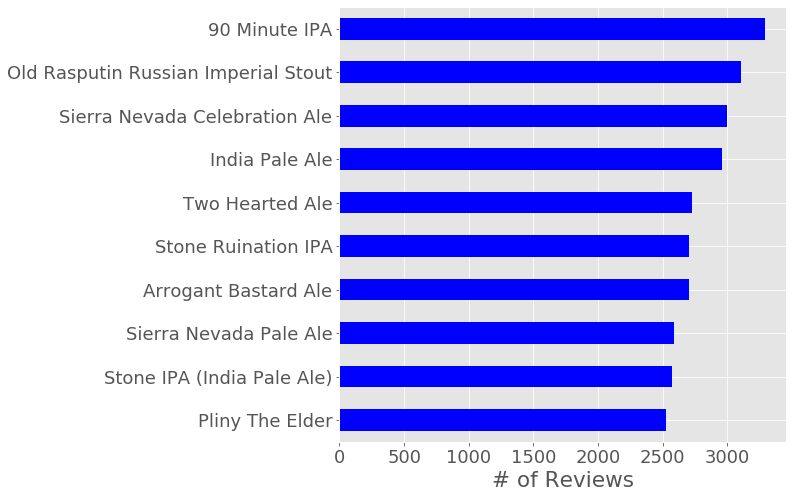

In [39]:
plt.figure(figsize=(8, 8))
beer_names_top_10 = beer_names.head(10)
beer_names_top_10.plot(kind='barh', color="blue")
plt.gca().invert_yaxis()
# plt.title("Most Reviewed Beer Marks")
plt.xlabel("# of Reviews")
# plt.ylabel("Beer Name")
plt.savefig("./images/most_reviewed_beers.svg", bbox_inches='tight')
plt.show()

#### Most Active Users

In [40]:
users = df['review_profilename'].value_counts()
users.head(10)

northyorksammy    5346
mikesgroove       4283
BuckeyeNation     4246
Thorpe429         3273
brentk56          3186
womencantsail     3163
ChainGangGuy      3151
Phyl21ca          3138
NeroFiddled       3098
oberon            2899
Name: review_profilename, dtype: int64

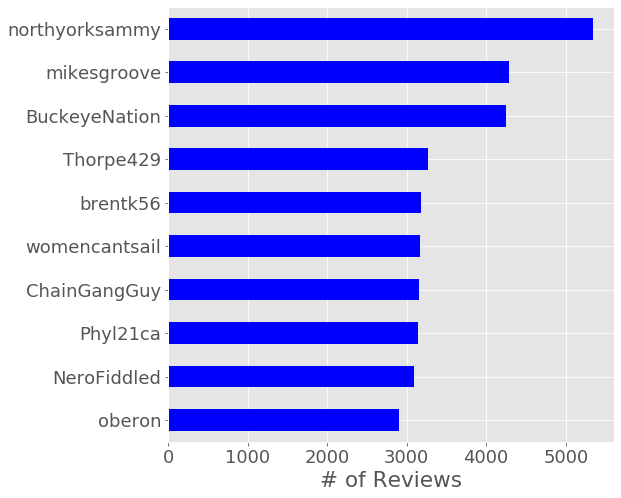

In [41]:
plt.figure(figsize=(8, 8))
users_top_10 = users.head(10)
users_top_10.plot(kind='barh', color="blue")
plt.gca().invert_yaxis()
# plt.title("Most Active Users")
plt.xlabel("# of Reviews")
# plt.ylabel("User Name")
plt.savefig("./images/most_active_users.svg", bbox_inches='tight')
plt.show()

#### Most Popular Beer Styles

In [42]:
styles = df['beer_style'].value_counts()
styles.head(10)

American IPA                        113144
American Double / Imperial IPA       85105
American Pale Ale (APA)              58071
Russian Imperial Stout               53424
American Double / Imperial Stout     50137
American Porter                      46647
American Amber / Red Ale             41730
Belgian Strong Dark Ale              37498
Fruit / Vegetable Beer               31983
American Strong Ale                  31350
Name: beer_style, dtype: int64

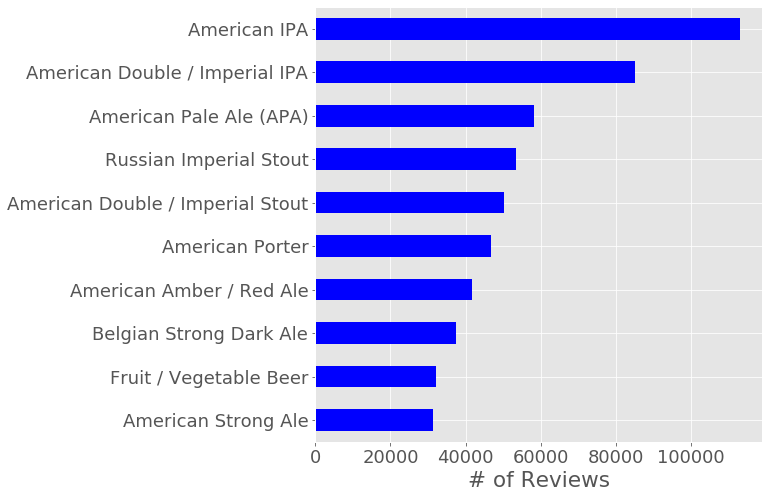

In [43]:
plt.figure(figsize=(8, 8))
styles_top_10 = styles.head(10)
styles_top_10.plot(kind='barh', color="blue")
plt.gca().invert_yaxis()
# plt.title("Most Popular Beer Styles")
plt.xlabel("# of Reviews")
# plt.ylabel("Beer Style")
plt.savefig("./images/most_popular_beer_styles.svg", bbox_inches='tight')
plt.show()

### Average Score

In [44]:
df['review_average'] = df.apply(lambda row: (row["review_overall"] + row["review_aroma"] + 
                                                 row["review_appearance"] + row["review_palate"] + 
                                                 row["review_taste"]) / 5, axis=1)

df = df.drop(df[(df["review_average"] < 1) | (df["review_average"] > 5)].index)
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,review_average
0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,1.8
1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,2.9
2,10325,Vecchio Birraio,2009-03-01 14:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215,2.9
3,10325,Vecchio Birraio,2009-02-15 19:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969,3.0
4,1075,Caldera Brewing Company,2010-12-30 18:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883,4.2


In [45]:
print("Mean is", round(df['review_average'].mean(), 2))
print("Median is", statistics.median(df['review_average']))

Mean is 3.8
Median is 3.9


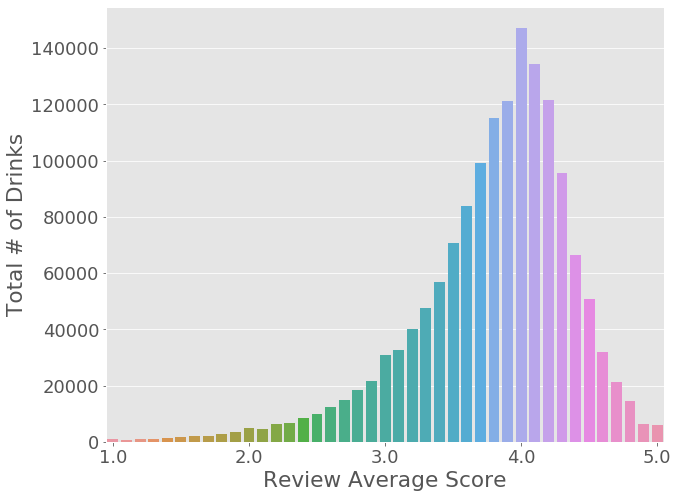

In [46]:
fig = plt.figure(figsize=(10, 8))
plot_ = sns.countplot(x='review_average', data=df) 

fig.canvas.draw()
new_ticks = [i.get_text() for i in plot_.get_xticklabels()]
plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
plt.xlabel("Review Average Score")
plt.ylabel("Total # of Drinks")
plt.savefig("./images/review_average.svg", bbox_inches='tight')
plt.show()

### Correlation

In [47]:
review_corr = df[["review_appearance", "review_aroma", "review_palate", "review_taste", "review_overall"]].corr()
review_corr

,review_appearance,review_aroma,review_palate,review_taste,review_overall
review_appearance,1.000000,0.559084,0.564558,0.544570,0.498480
review_aroma,0.559084,1.000000,0.614922,0.714774,0.612797
review_palate,0.564558,0.614922,1.000000,0.732198,0.699026
review_taste,0.544570,0.714774,0.732198,1.000000,0.787177
review_overall,0.498480,0.612797,0.699026,0.787177,1.000000


In [48]:
# mask = np.triu(np.ones_like(review_corr))

# fig, ax = plt.subplots(figsize=(8, 8))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# ax.xaxis.set_ticks_position('top')

# sns.heatmap(review_corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.show()

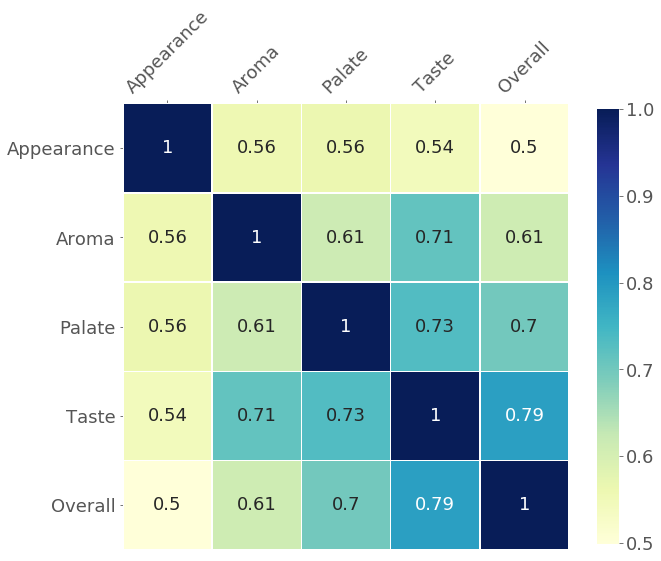

In [49]:
axis_labels = ["Appearance", "Aroma", "Palate", "Taste", "Overall"]

fig, ax = plt.subplots(figsize=(10, 10))
ax.xaxis.set_ticks_position('top')

sns.heatmap(review_corr, annot=True, cmap="YlGnBu", linewidths=.5, xticklabels=axis_labels, yticklabels=axis_labels, square=True, cbar_kws={"shrink": .8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.savefig("./images/corr_review.svg", bbox_inches='tight')
plt.show()